In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
# To use only Google Colab
! pip install matplotlib --upgrade
! wget https://github.com/javieriserte/qualitative-data-course/raw/master/classes/C01.py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 4.6 MB/s 
     |████████████████████████████████| 965 kB 45.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


--2022-11-19 13:52:42--  https://github.com/javieriserte/qualitative-data-course/raw/master/classes/C01.py
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javieriserte/qualitative-data-course/master/classes/C01.py [following]
--2022-11-19 13:52:42--  https://raw.githubusercontent.com/javieriserte/qualitative-data-course/master/classes/C01.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18158 (18K) [text/plain]
Saving to: ‘C01.py’

C01.py              100%[===================>]  17.73K  --.-KB/s    in 0s      

2022-11-19 13:52:42 (40.4 MB/s) - ‘C01.py’ saved [18158/18158]



# Unidad I: Variables, distribuciones y pruebas de hipótesis

- Variables aleatorias y funciones de distribución.
- Variables aleatorias discretas y continuas, niveles de medición.
- Distribuciones importantes
- Generación de distribuciones a partir de operaciones con variables aleatorias
  conocidas.


## Variables aleatorias

- Variable categórica o cualitativas: Variables que representan grupos o
categorías.
- Puede tener escala nominal u ordinal.
  - Las variables nominales no tienen un orden definido
  - mientras las ordinales o casi cuantitativas tienen un orden definido.
- Variable cuantitativas: Pueden ser discretas o continuas.

Es importante notar que los métodos desarrollados para variables
ordinales no pueden ser utilizados con variables nominales.

Los métodos para variables nominales pueden ser utilizados con variables
ordinales, pero se pierde poder en el proceso, debido a que no se utiliza la
información relativa al orden.

La variables cualitativas con solo dos niveles suelen denominarse binarias,
dicotómicas o booleanas.

En los análisis estadísticos, las variables aleatorias pueden clasificarse
como:

- Variable explicativa: es aquella que se controla en el diseño experimental.
- Variable de respuesta: es aquella que se observa o mide en el experimento.

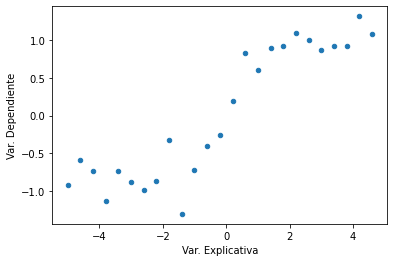

In [2]:
import C01
C01.variables_plot()

## Funciones de distribución

### Función de masa/densidad de probabilidad

- Describen la probabilidad relativa de una variable a tomar un cierto valor.

- Se nombran diferente de acuerdo al tipo de variable aleatoria a la que están
  aplicadas:

  - Variables continuas: Función de densidad de probabilidad (**PDF** por
    Probability Density Function)

  - Variables discreta: Función de masa de probabilidad (**PMF** por Probability
    Mass Function)

- El área bajo la curva es la probabilidad.
  - PMF:
    - $PMF_X(a) = \text{probabilidad de obtener X = a}$
    - El valor de $PMF_X$ está en el rango $[0, 1]$ para todo el dominio.

  - PDF:
    - No tienen sentido evaluarlas en un punto del dominio.
    - Para obtener un probabilidad debemos integrar la función en un intervalo:
      - $\int_a^b{PDF_X{(x)}dx} = P(a\leq X \leq b)$

- El área total bajo la curva es siempre igual a uno.

  - PMF: $\sum_{x}PMF_X(x) = 1$
  - PDF: $\int{PDF_X(x)dx} = 1$


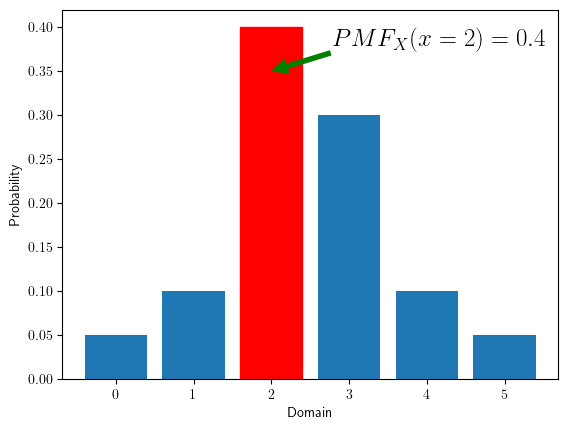

In [ ]:
import C01

C01.pmf_example()

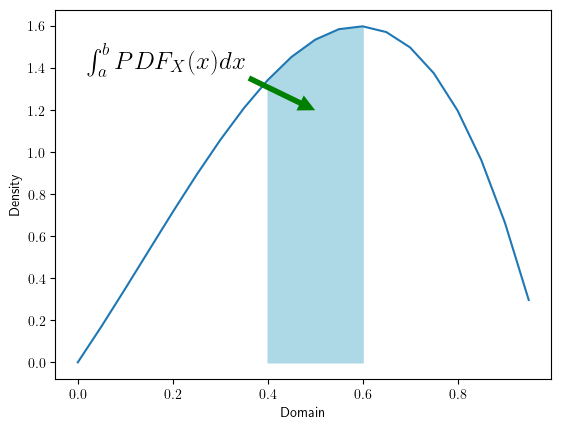

In [ ]:
C01.pdf_example()

### Funciones de distribución acumulada

Es una función que retorna la probabilidad de que una variable aleatoria no
nominal sea menor o igual a un determinado valor.

- $F_X(x) = P(X\leq x)$

- Tienen diferentes nombres dependiendo del tipo de variable.
  - Para variables continuas: CDF (Cummulative density function):
    - $ CDF_X(x) = \int_{-\infty}^{x} PDF_X(u) du $
  - Para variables categóricas: CMF (Cummulative mass function):
    - $ CMF_X{x} = \sum\limits_{X \leqslant x} PMF_X(x) $

- La imagen es el intervalo $[0, 1]$.
- Es monótona creciente.
- Es fácil obtener la probabilidad de que un valor de $X$ caiga dentro de un
  cierto intervalo $(a,b]$ usando su $CDF$:
  - $P(a < X \leqslant b) = CDF_X(b) - CDF_X(a)$

- Para calcular la probabilidad de observar un valor mayor a otro dado:
  - $CCDF(x) = P(X > x) = 1 - CDF(x)$
  - (*Complementary Cumulative Distribution Function*, **CCDF**)


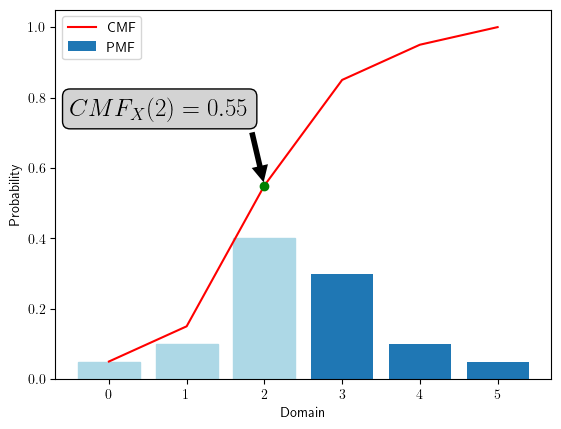

In [ ]:
import C01
C01.cmf_example()

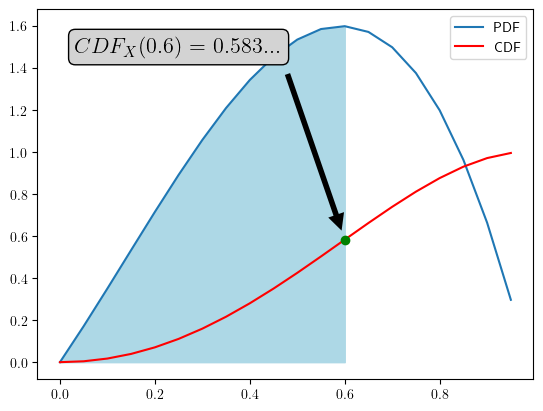

In [ ]:
import C01
C01.cdf_example()


## Niveles de medición

- Una *variable aleatoria* es una función que puede tomar una serie de valores medibles u observables.
- La frecuencia de aparición de los valores está asociada a una
  distribución de probabilidad.
- Estas variables resultan de *experimentos aleatorios*.
  - Dada las mismas condiciones iniciales no se obtienen los mismos resultados en cada *experiencia* o *prueba*.

- Los resultados de una *variable aleatoria* pueden medirse en diferentes *escalas de medida*:

| Nivel | Variable | Precisión | Descripción  | Operaciones |
|-------|----------|-----------|--------------|-------------|
| Nominal | Cualitativas | Menor | No hay orden | `==` `!=` |
| Ordinal | Cualitativas, Cuantitativas | Intermedia | Hay orden pero no hay distancias | ... `<` `>` `<=` `>=` |
| Intervalar | Cuantitativas | Intermedia | El cero/la escala es arbitrario/a | ... `+` `-` |
| Racional | Cuantitativas | Mayor | El cero/la escala no es arbitrario/a | ... `/` `//` ... *(todas)* |


## Distribuciones paramétricas y no paramétricas

- Distribuciones paramétricas:
  - La forma de la distribución está dada por un modelo matemático teórico que
    describe el problema de origen.
  - Suelen tener uno o más parámetros que definen la forma.
  - Ejemplos:
    - Normal, Exponential.

- Distribuciones no paramétricas:
  - Son construidas empíricamente a partir de los datos.
  - Ejemplos:
    - Histogramas
    - Triangular




## Distribuciones importantes

La distribuciones más conocidas para datos continuos o discretos son:

- la distribución Normal,
- la distribución T,
- la distribución de Poisson.

Algunas de las distribuciones más importantes para datos categóricos:

- la **Binomial**,
- la **Multinomial**



### Distribución Normal

- También llamada *Distribución de Gauss* o *Gaussiana*.
- Su función de densidad de probabilidad es la *campana de Gauss*.
- Tiene dos parámetros de forma:
  - el promedio $μ$
  - la desviación estándar $σ$
- Una distribución normal con parametros $μ=0$ y $σ=1$ se conoce como **normal estándar**:
  - $\mathcal{N}(0,1)$
- La ecuación de la distribución normal es:
  - $f(x, μ, σ) = \frac{1}{σ\sqrt{2 π}}exp \Bigg( {-\frac{(x - μ)^2}{2σ^2}} \Bigg)$

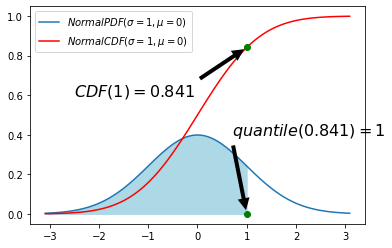

In [3]:
import C01
C01.normal_dist_description()

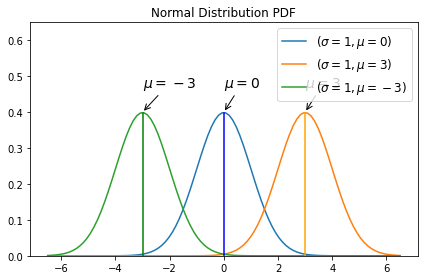

In [4]:
import C01
C01.normal_distribution_mu_plot()

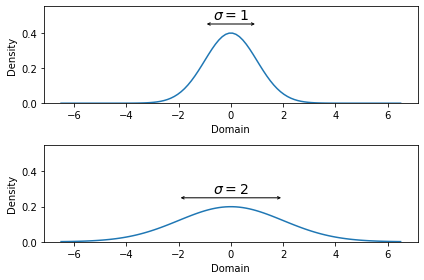

In [5]:
C01
C01.normal_distribution_sigma_plot()

- Esta distribución es importante debido al **Teorema Central del Límite**
  - Si se tiene una muestra de una distribución:
    - de valores *independientes e idénticamente distribuidos*
    - tamaño $n$
    - media poblacional $\mu$
    - desviación estándar $\sigma$
  - la distribución de la media muestral ($\overline{x_{n}}$)
    - converge a una distribución $\overline{x_{n}} \sim \mathcal{N}(\mu,\frac{\sigma}{\sqrt{n}})$
    - cuando $n \rightarrow \infty$


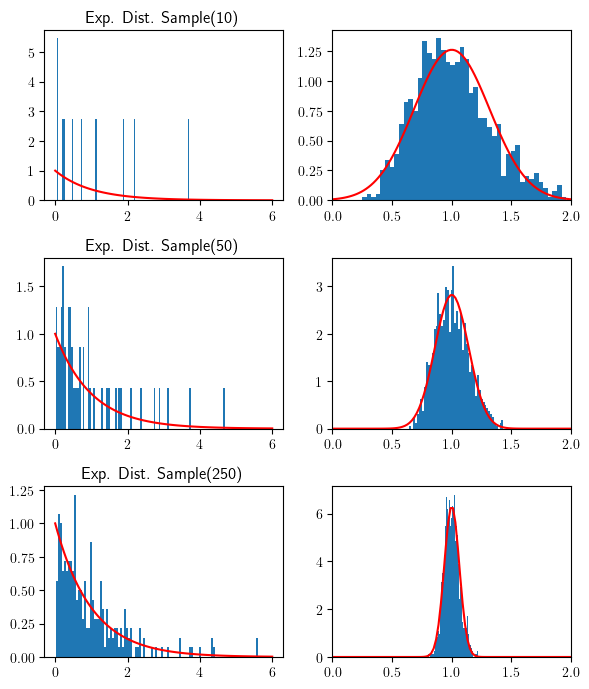

In [ ]:
import C01
C01.central_limit_plot()


Ejercicio:

- ¿Cómo puedo generar de datos aleatorios de una función de densidad de probabilidad?
  - Suponemos que sabemos obtener datos aleatorios de una     distrubición uniforme.

### Generación de datos aleatorios de una distribución normal

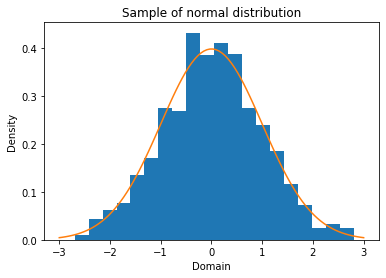

In [15]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

normal_sample = norm.rvs(
  loc = 0, # mu
  scale = 1, # sigma / std. dev.
  size = 1000 # tamaño de la muestra
)

plt.hist(
  normal_sample,
  bins = 20,
  density = True
)

plt.title("Sample of normal distribution")
plt.xlabel("Domain")
plt.ylabel("Density")

x = np.linspace(-3, +3, 100)
a = plt.plot(
    x,
    norm.pdf(x, loc = 0, scale = 1)
)


### Distribución T

La distribución T (de *Student*):
  - surge de estimar la media de:
    - una muestra pequeña de tamaño $n$
    - con distribución normal
    - y la desviación estándar de la población ($\sigma$) es desconocida.
  - La variable aleatoria que se obtiene de tener ...
    - la media de muestra ($\bar{X}$)
    - restarle la media poblacional ($\mu$)
    - dividirla por el cociente de:
      - la desviación estándar de la muestra ($S$)
      - sobre $\sqrt{n}$.
    - tiene un distribución T,
      - con $\nu = n-1$ grados de libertad.
  - La ecuación es $t = \frac{\overline{X_{n}}-\mu}{\frac{S_{n}}{\sqrt{n}}}$
  - La forma es:
    - similar a la distribución normal estándar
    - pero con colas más pesadas
  - Converge hacia:
    - una distribución normal $\mathcal{N}(0,1)$
    - cuando $\nu \rightarrow \infty$.
  - La función de densidad de probabilidad es:
    - $PDF_{T}(x, \nu) = \frac{\Gamma (\frac{\nu+1}{2})}{\sqrt{\nu\pi}\times \Gamma(\frac{\nu}{2})}\bigg(1+\frac{x^2}{2}\bigg)^{-\frac{\nu+1}{2}}$
    - $\Gamma$ es la función Gamma.





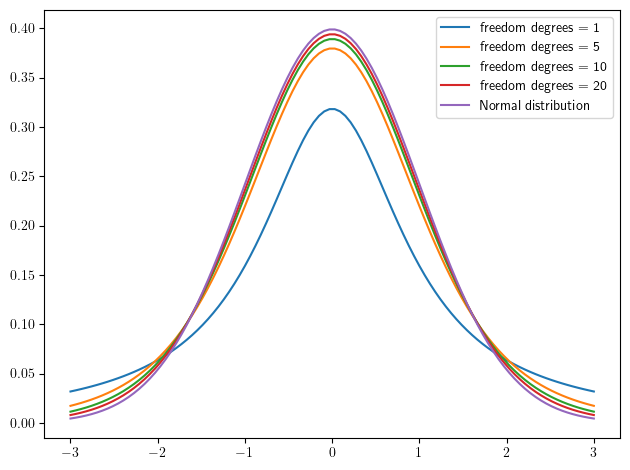

In [ ]:
import C01
C01.distribution_t_plot()

### Poisson Distribution

Es una función:
- de probabilidad discreta
- describe la cantidad de eventos independientes
- que ocurren dentro de una unidad de tiempo (o espacio, area, volumen, etc).
- $PMF(k, \lambda) = \frac{\lambda^k}{k!}e^{-\lambda}$
  - $\lambda$ es la frecuencia promedio de ocurrencia de un evento.
  - $\lambda = E(X) = Var(X)$


Un ejemplo:

- Al año una persona recibe un promedio de 77 llamadas fraudulentas por
  teléfono.
- Cual es la distribución de probabilidades de obtener 0, 1, 2, etc llamadas en
  30 días.


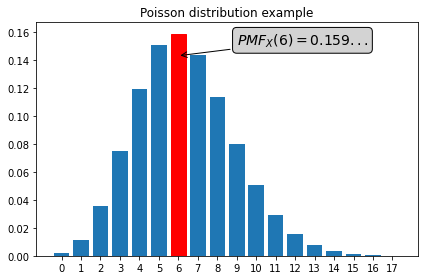

In [19]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

# Calcular la probabilidad promedio
p = (77 / 365) * 30

x = np.arange(int(3*p))

y = poisson.pmf(
  k = x,
  mu = p
)

bplot = plt.bar(
  x = x,
  height = y
)

bplot.patches[6].set_color("red")
plt.annotate(
  xy = (6, poisson.pmf(6, p) * 0.9),
  xytext = (9, poisson.pmf(6, p) * 0.95),
  text = f"$PMF_X(6) = {poisson.pmf(6, p):0.3f}...$",
  arrowprops = dict(
    arrowstyle = "->"
  ),
  fontsize = 14,
  bbox = dict(
    boxstyle = 'round',
    fc = 'lightgray'
  )
)
plt.title("Poisson distribution example")

plt.xticks(
  ticks = x,
  labels = x
)
plt.tight_layout()



### Distribución Binomial

- Se utiliza con:
  - variables categóricas
  - que sólo pueden tomar dos valores (dicotómicas)
    - *éxito* (`1`, `true`)
    - *fracaso* (`0`, `false`).
  - El número de éxitos:
    - producios de $n$ ensayos (*ensayos de Bernoulli*)
    - sigue una **distribución binomial** con parámetros $n$ y $p$
      - $p$ es la probabilidad de éxito.
  - Se asume que:
    - $n$ es fijado de antemano.
    - $p$ es idéntico en todos los ensayos.
  - Se puede describir con la ecuación:
  - $P(X=k) = {n\choose k}p^k(1-p)^{n-k}, 0 \leq k \leq n$
  - ${n \choose k} = \frac{n!}{(n-k)!k!} = \text{Combinaciones de k sobre n}$

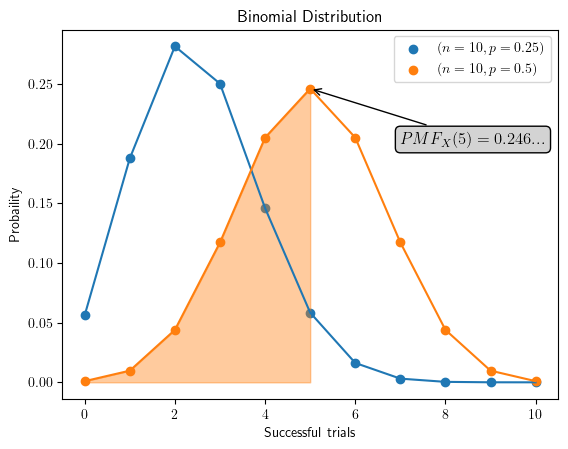

In [ ]:
import C01
C01.binomial_plot()

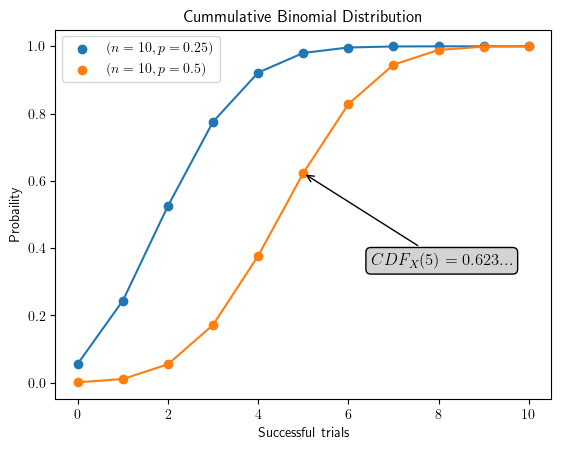

In [ ]:
import C01
C01.binomial_cmf_plot()


### Distribución Multinomial

Es una generalización de la **distribución binomial**
  - más de dos categorías.
  - Para $n$ ensayos
  - en $k$ categorías
  - cada categoría tiene una probabilidad de éxito fija $p_{k}$
  - da la probabilidad de
    - una combinación de números de éxitos particular
    - para varias categorías.
  - Se puede representar con la ecuación:
    - $ \frac{n!}{x_1! \dotsm x_k!}p_1^{x_1} \dotsm {p_k^{x_k}}$

¿Cuál es la probabilidad de obtener una tirada con seis dados en la que todos los
valores sean diferentes?

In [26]:
from scipy.stats import multinomial

# Defino las probabilidades de exito de cada evento
pk = [1/6] * 6
print(
  multinomial.pmf([1]*6, n=6, p=pk)
)

n_samples = 100000
sample = multinomial.rvs(n=6, p=pk, size = n_samples)

uniques = np.apply_along_axis(
   np.max, 1, sample
)
uniques

number_success = uniques[uniques == 1].sum()
number_success / n_samples

0.01543209876543212


0.01547

¿Cuál es la probabilidad obtener al menos 5 dados iguales?


In [ ]:
from scipy.stats import multinomial

# Defino las probabilidades de exito de cada evento

pk = [1/6] * 6
prob_6_1 = multinomial.pmf([6, 0, 0, 0, 0, 0], n=6, p=pk)
prob_6 = prob_6_1 * 6
prob_5_1_and_1_2 = multinomial.pmf([5, 1, 0, 0, 0, 0], n=6, p=pk)
prob_5_1 = prob_5_1_and_1_2 * 5
prob_5 = prob_5_1 * 6
print(f"La probabilidad de obtener exactamente 5 iguales es: {prob_5}")
print(f"La probabilidad de obtener exactamente 6 iguales es: {prob_6}")
print(f"La probabilidad de obtener al menos 5 iguales es: {prob_5 + prob_6}")

La probabilidad de obtener exactamente 5 iguales es: 0.003858024691358027
La probabilidad de obtener exactamente 6 iguales es: 0.00012860082304526718
La probabilidad de obtener al menos 5 iguales es: 0.003986625514403294


Otra forma de resolverlo, detallando explicitamente todas las combinaciones
posibles.

In [ ]:
cases = np.row_stack(
  [
    np.identity(n=6) * 6
  ] +
  [
    np.insert(
    arr = np.identity(n=5),
    obj = x,
      values = 5,
      axis = 1
    )
    for x in np.arange(6)
  ]
)

prob_5_6 = multinomial.pmf(cases, n = 6, p=pk).sum()
print(f"La probabilidad de obtener al menos 5 iguales es: {prob_5_6}")

La probabilidad de obtener al menos 5 iguales es: 0.0039866255144032975


"Corroboramos" el resultado con datos simulados.

In [ ]:
n_samples = 10000000
sample = multinomial.rvs(
  n=6,
  p=pk,
  size = n_samples
)

uniques = np.apply_along_axis(
  lambda x: any(x>=5), 1, sample
)

number_success = uniques[uniques == 1].sum()
print(
  "Número de éxitos hallados / esperados: "
  f"[{number_success} / {n_samples*(prob_5+prob_6)}]"
)
number_success / n_samples

Número de éxitos hallados / esperados: [40016 / 39866.25514403294]


0.0040016